In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np


In [5]:
 def load_image():
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
  return (x_train, y_train) , (x_test, y_test)

In [6]:
(x_train, y_train), (x_test, y_test) = load_image()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


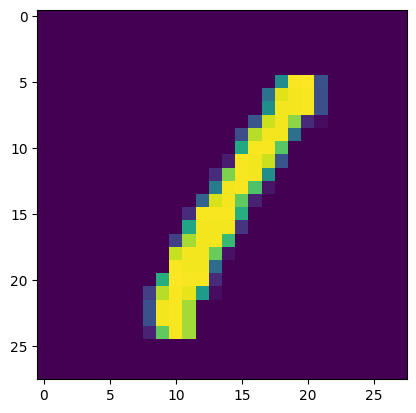

In [7]:
def tensor_to_gscale(x_train):
  img_from_array = []
  for i in range(len(x_train)):
    image_array = x_train[i].reshape(x_train[i].shape[0],x_train[i].shape[1],1)
    img = array_to_img(image_array)
    img = img.convert('L')
    img_from_array.append(np.array(img))
  return img_from_array
def printing(images):
 plt.imshow(images[3])
images = tensor_to_gscale(x_train)
printing(images)



In [8]:
def normalizing(x_train,x_test):
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  return x_train,x_test
x_train,x_test = normalizing(x_train,x_test)

In [9]:
def model_building():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  return model
def compile_model(model):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


model = model_building()
model = compile_model(model)
model.fit(x_train,y_train,epochs = 20,batch_size = 24,validation_data =(x_test,y_test))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.3891 - loss: 1.6861 - val_accuracy: 0.5107 - val_loss: 0.9992
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4508 - loss: 1.1515 - val_accuracy: 0.7045 - val_loss: 0.7188
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5972 - loss: 0.9168 - val_accuracy: 0.8044 - val_loss: 0.4627
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7178 - loss: 0.7030 - val_accuracy: 0.9002 - val_loss: 0.3018
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7445 - loss: 0.5945 - val_accuracy: 0.9029 - val_loss: 0.2454
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7494 - loss: 0.5565 - val_accuracy: 0.9020 - val_loss: 0.2230
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7520 - loss: 0.5340 - val_accuracy: 0.9040 - val_loss: 0.2102
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7768 - loss: 0.507

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Predicted Class: 4


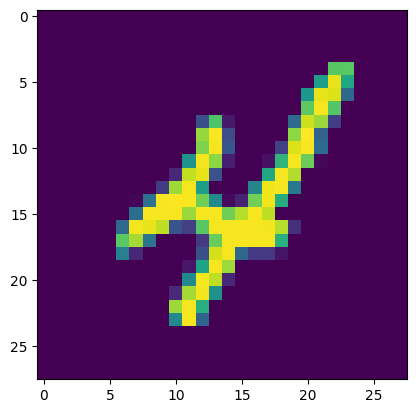

In [10]:
def find_and_check_with_image(image):
  img = image.reshape(1,image.shape[0],image.shape[1],1)
  prediction = model.predict(img)
  predicted_class = np.argmax(prediction)
  print(f"Predicted Class: {predicted_class}")
  img = image.reshape(image.shape[0],image.shape[1],1)
  img = array_to_img(img)
  img = img.convert('L')
  plt.imshow(img)
find_and_check_with_image(x_train[9])



In [18]:
def find_loss():
  loss, accuracy = model.evaluate(x_test, y_test)
  print(f"Test Loss: {loss}")
  print(f"Test Accuracy: {accuracy*100}%")
find_loss()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0706
Test Loss: 0.056531138718128204
Test Accuracy: 99.07000064849854%


In [16]:
images[0].shape

(28, 28)

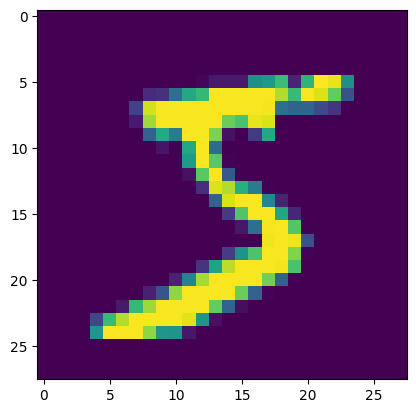

In [17]:
img = images[0].reshape(images[0].shape[0],images[0].shape[1],1)
img = array_to_img(img)
img = img.convert('L')
plt.imshow(img)

In [14]:
#saving the model
import pickle
with open('model_pickle.pkl','wb') as f:
  pickle.dump(model,f)
print("Model saved to model_pickle.pkl")

Model saved to model_pickle.pkl


In [22]:
with open('model_pickle.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: 5


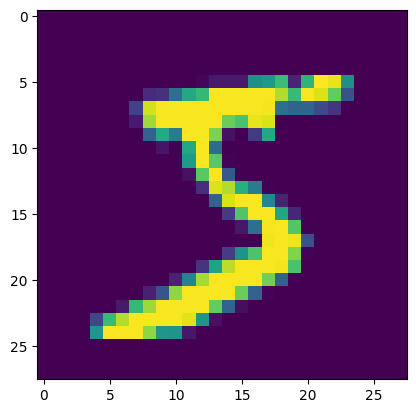

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 0


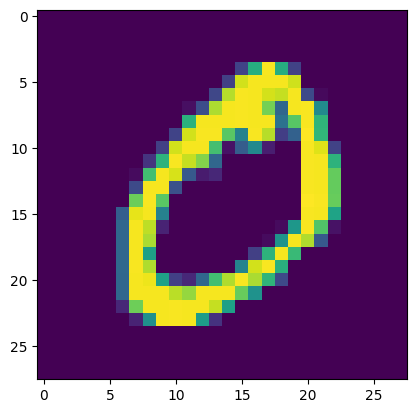

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 4


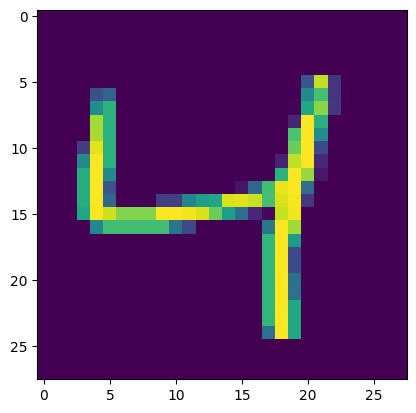

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 4


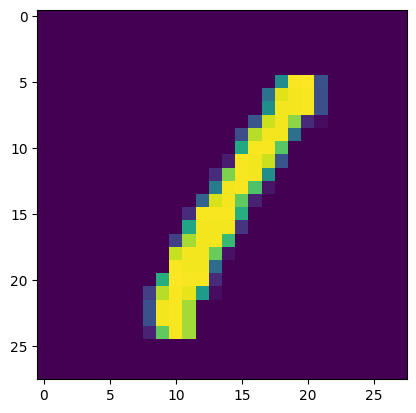

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: 9


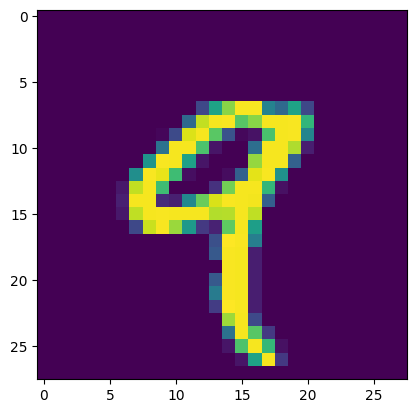

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 0


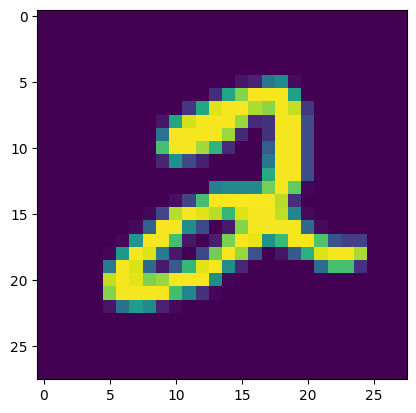

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: 1


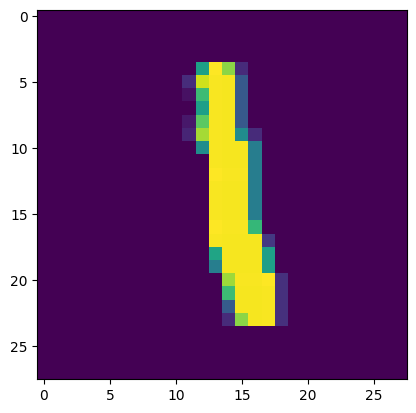

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


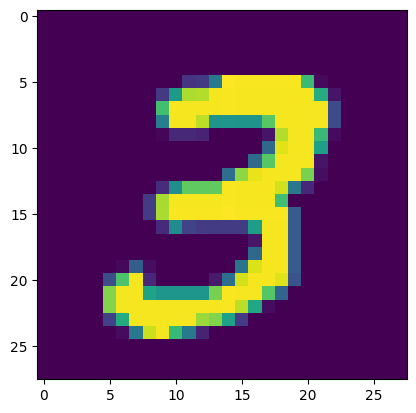

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: 1


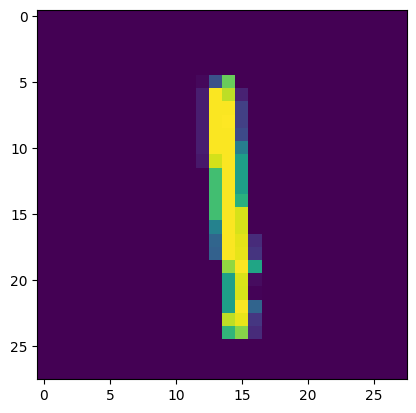

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 4


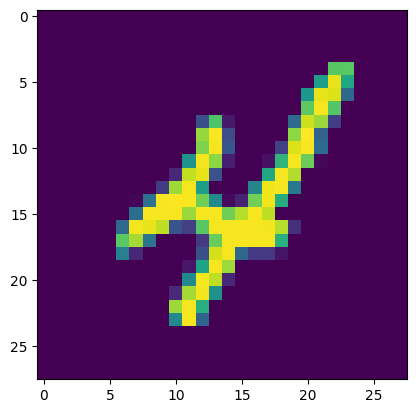

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 3


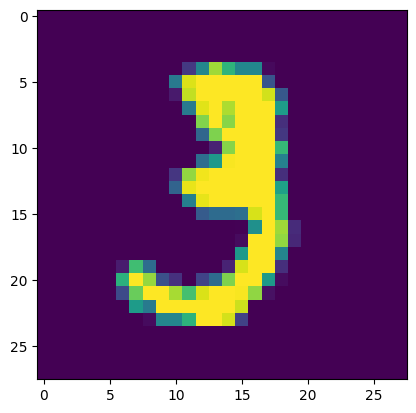

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 5


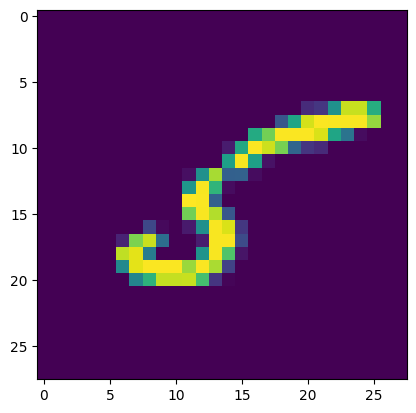

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 3


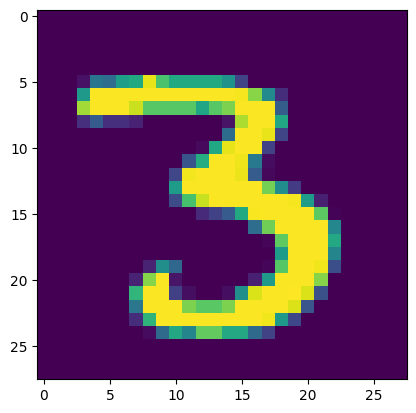

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 6


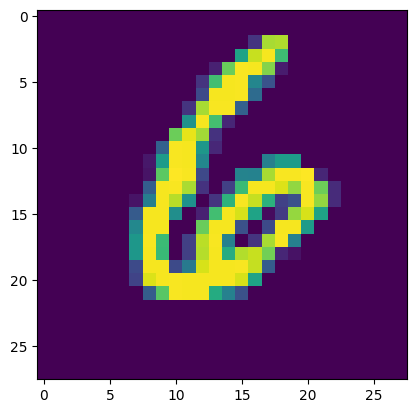

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 1


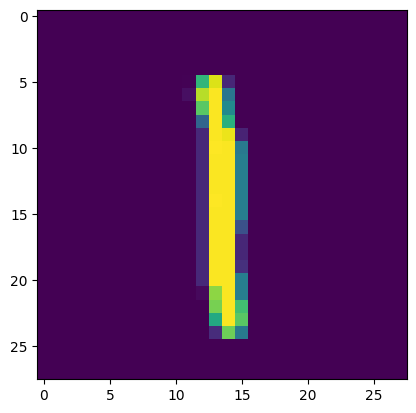

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 7


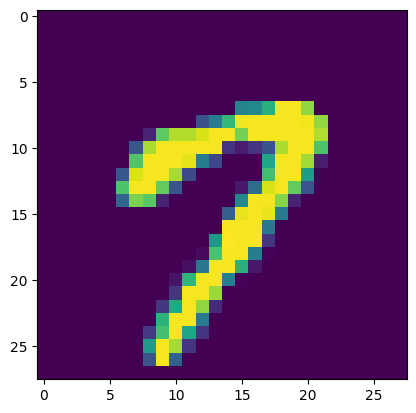

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 0


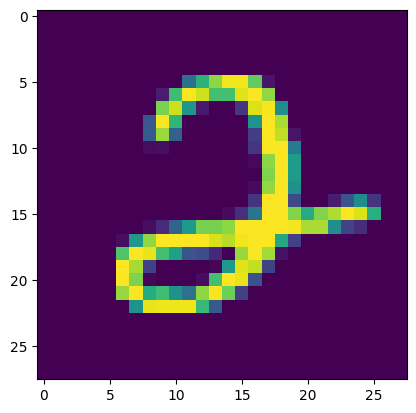

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


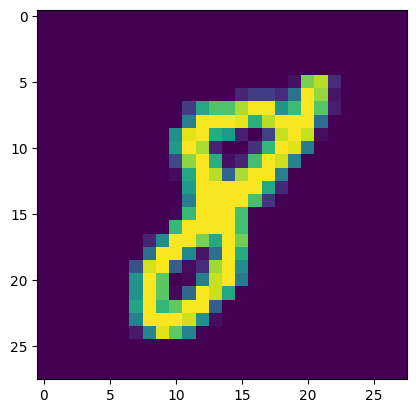

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 6


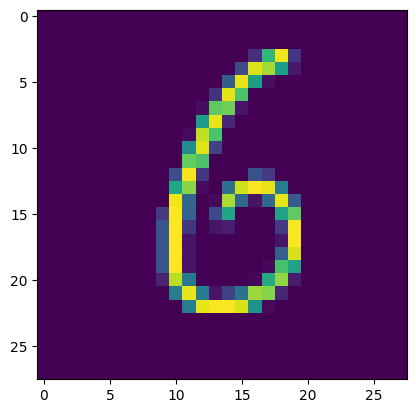

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 9


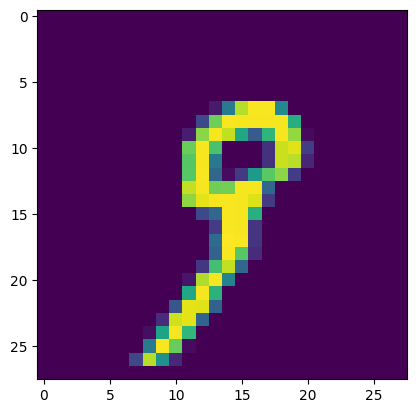

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 4


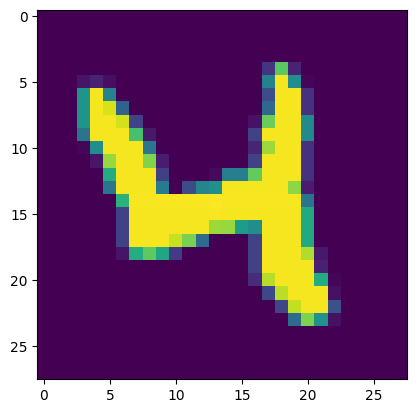

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 0


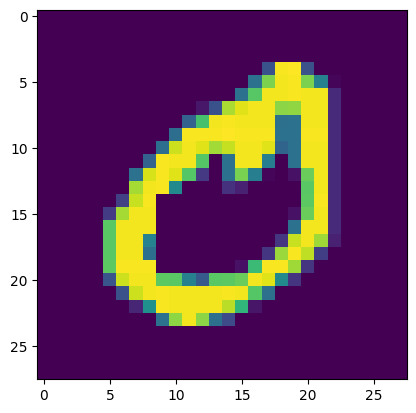

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 9


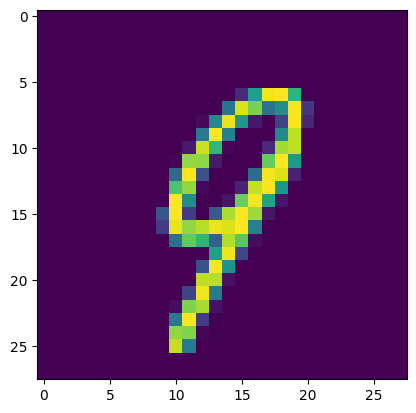

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 4


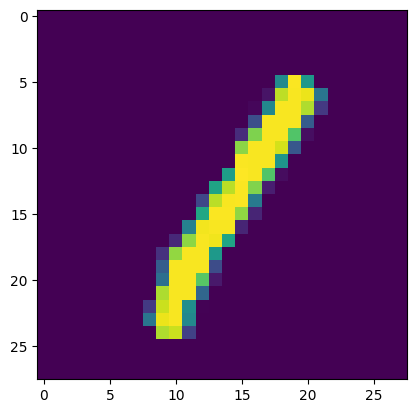

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 1


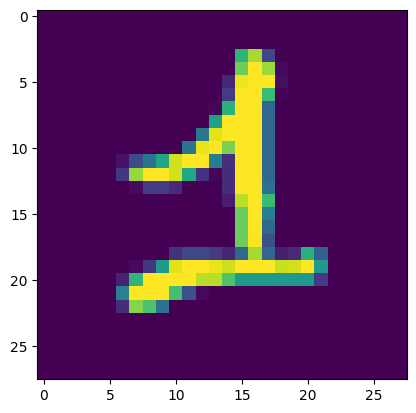

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 8


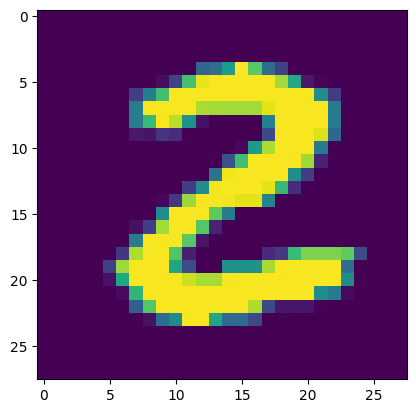

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 4


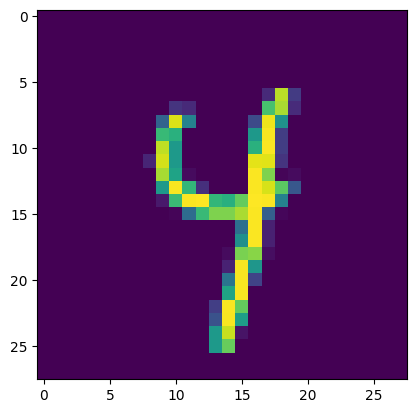

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 3


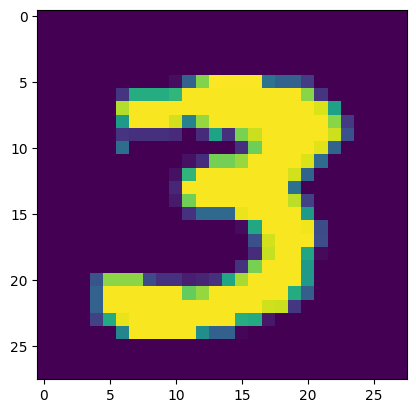

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 8


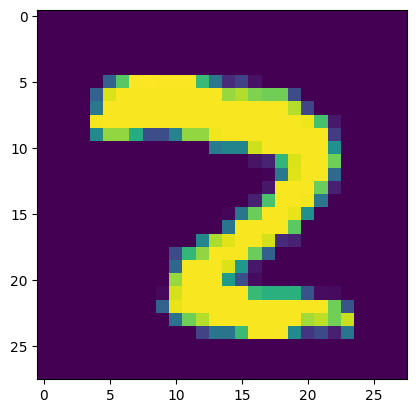

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 2


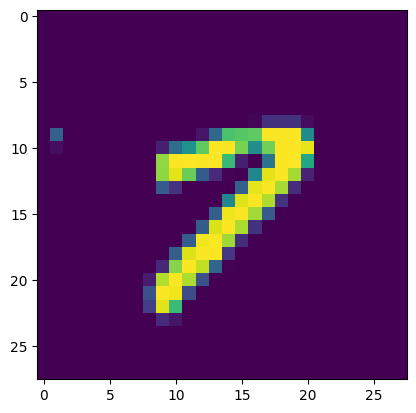

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 3


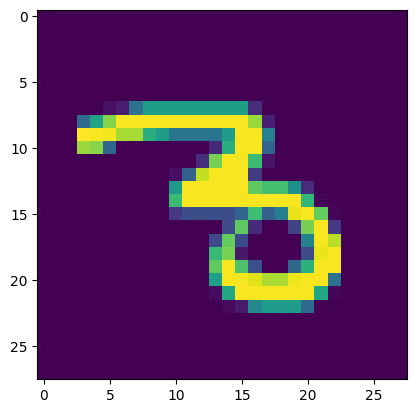

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 8


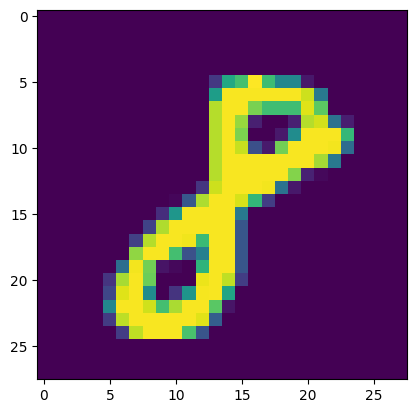

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: 6


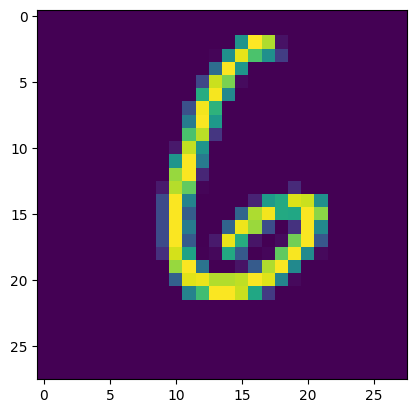

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 9


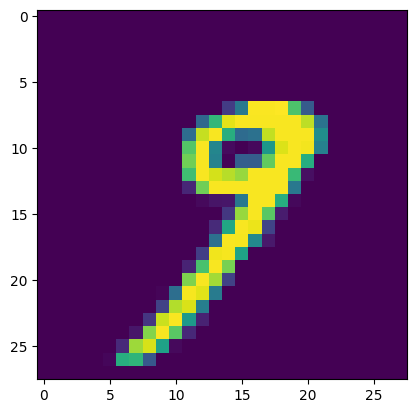

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 0


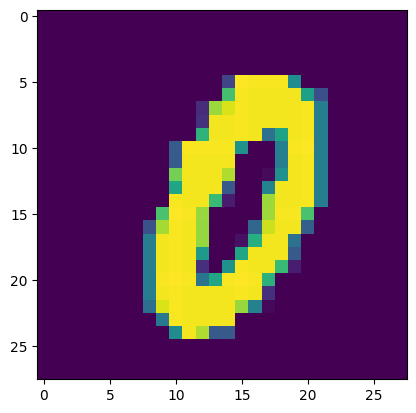

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 5


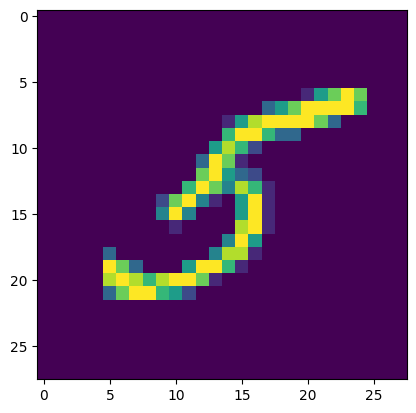

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 6


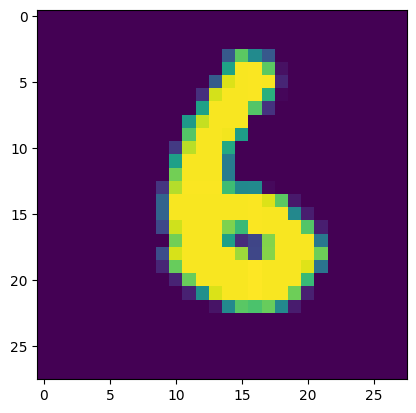

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 0


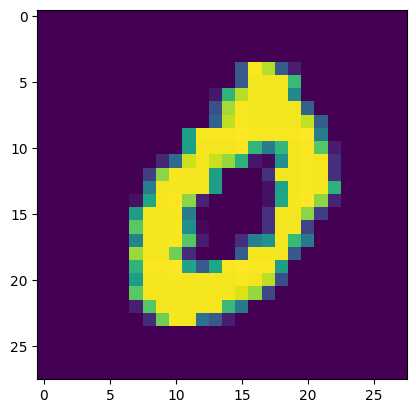

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 7


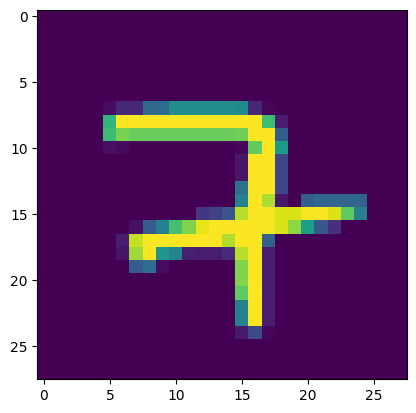

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class: 6


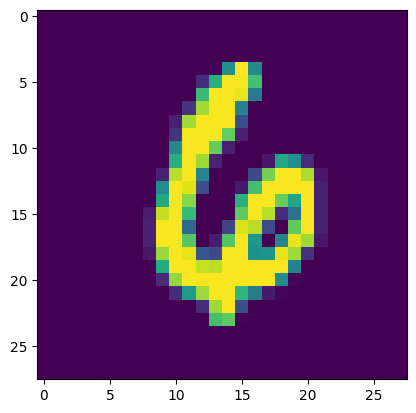

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 1


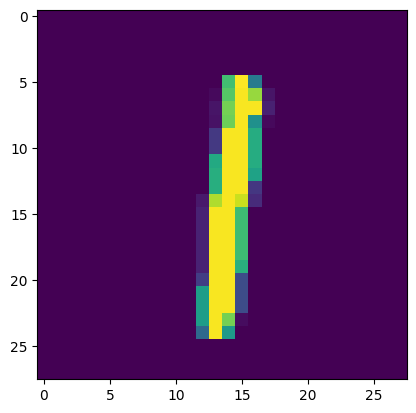

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


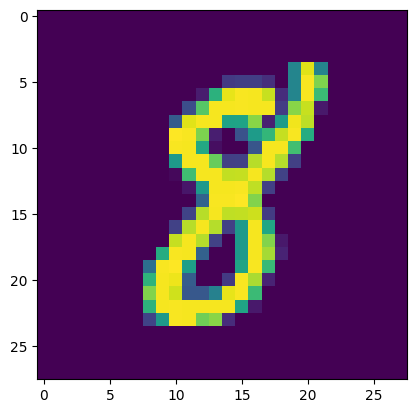

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 7


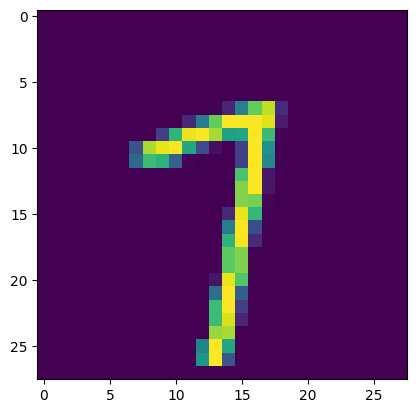

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: 9


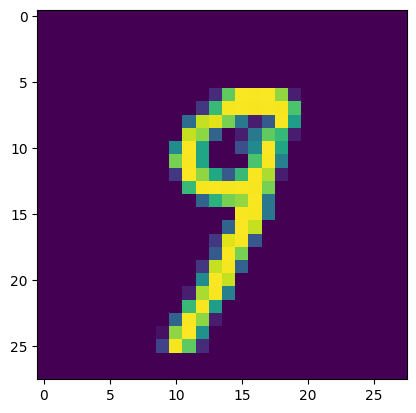

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: 3


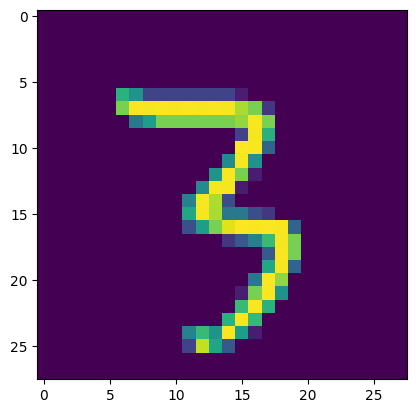

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: 9


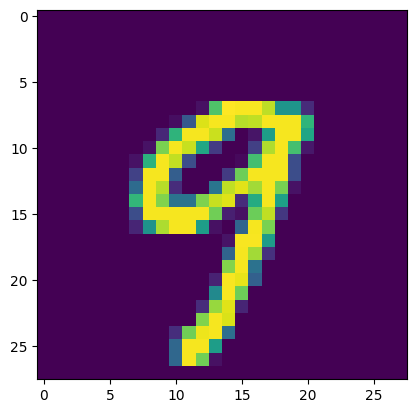

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 3


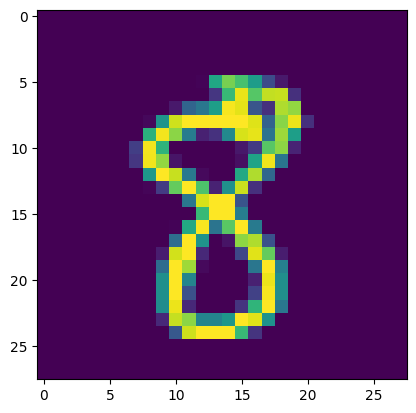

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 5


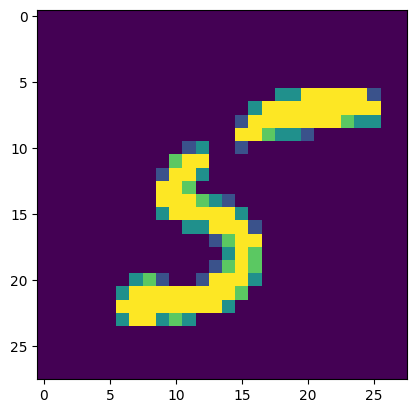

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 9


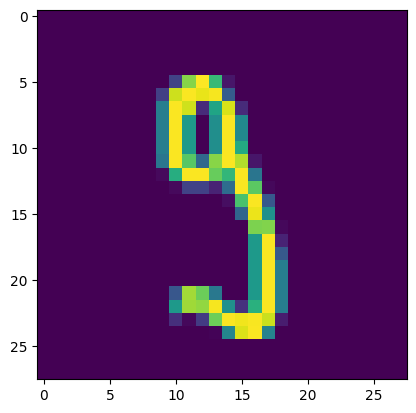

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


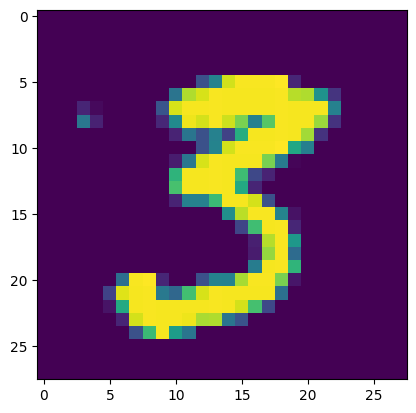

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 3


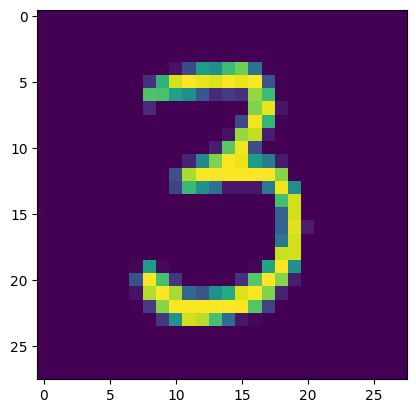

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 0


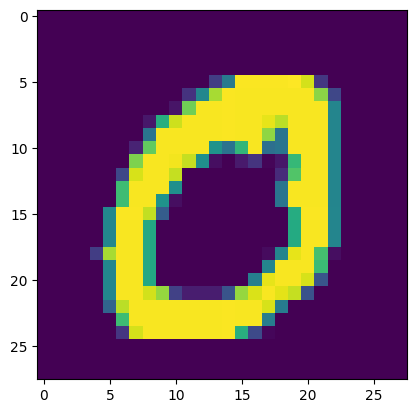

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 7


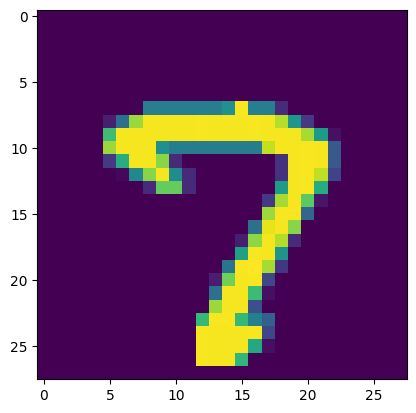

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 4


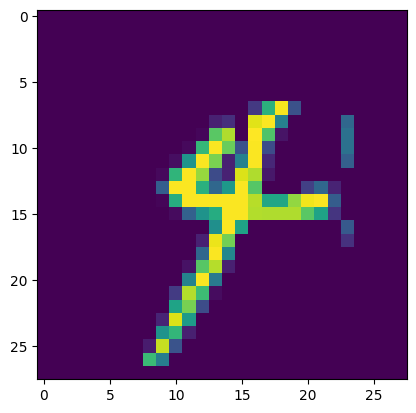

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: 9


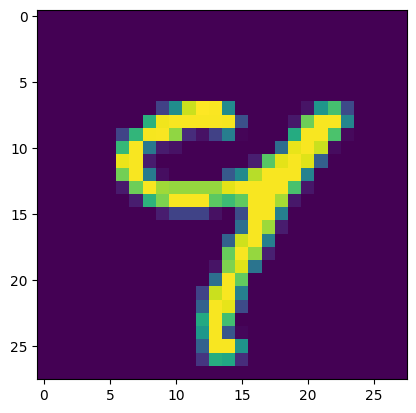

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


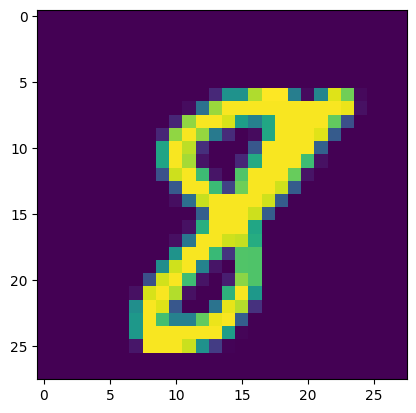

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 0


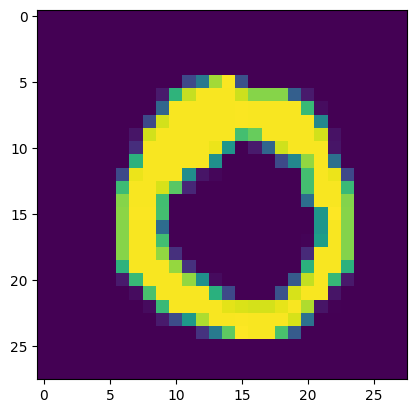

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: 9


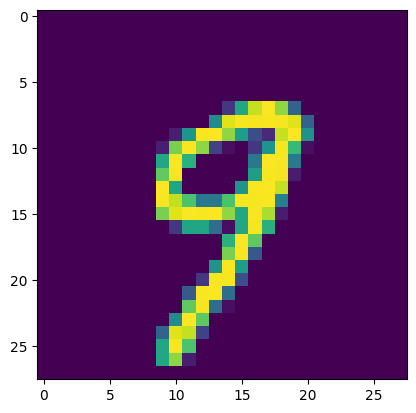

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: 4


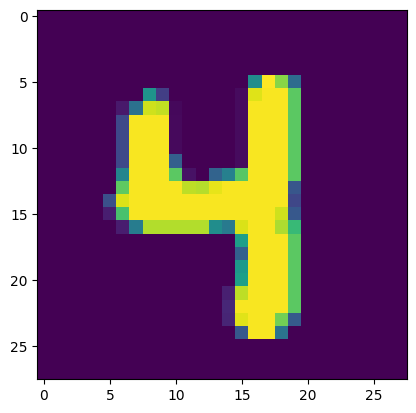

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class: 1


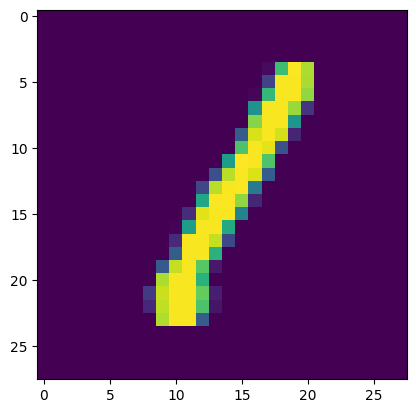

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: 4


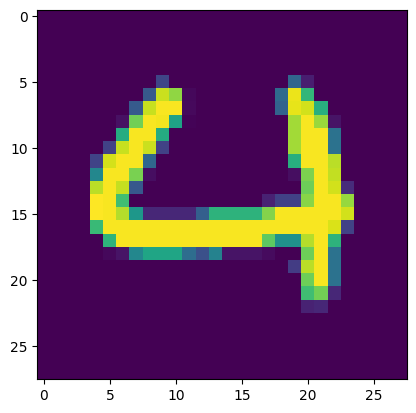

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: 4


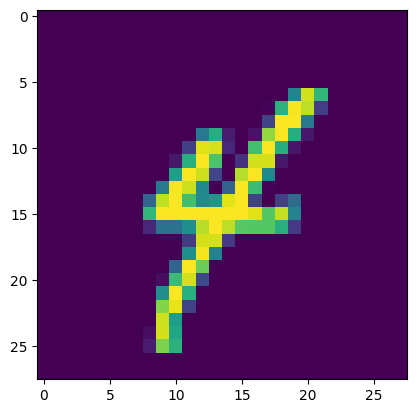

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: 6


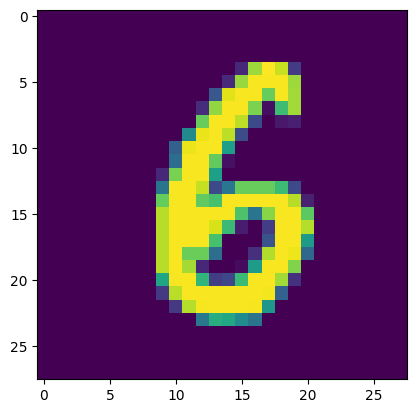

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: 0


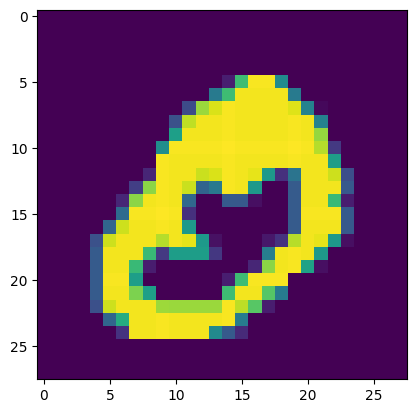

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: 4


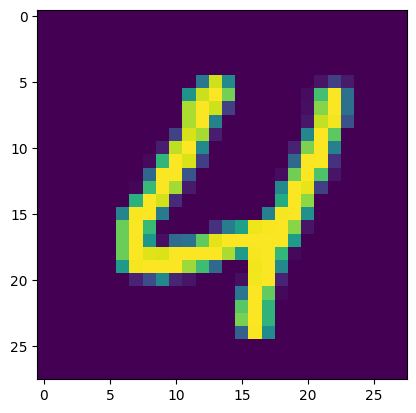

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: 5


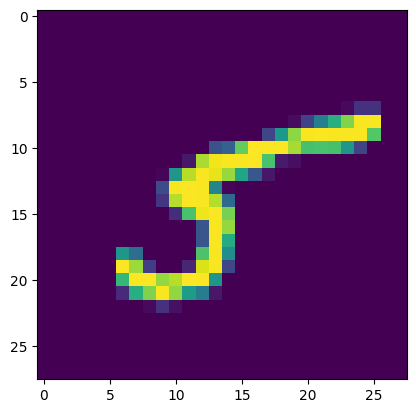

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: 6


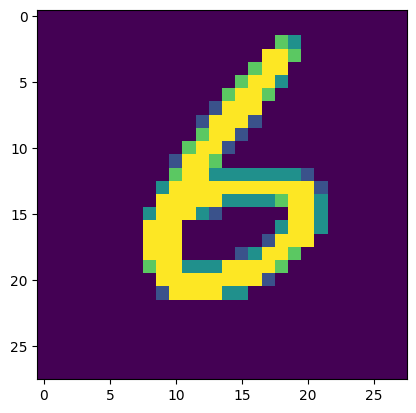

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 9


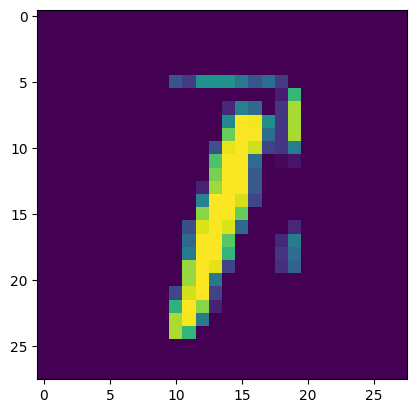

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 0


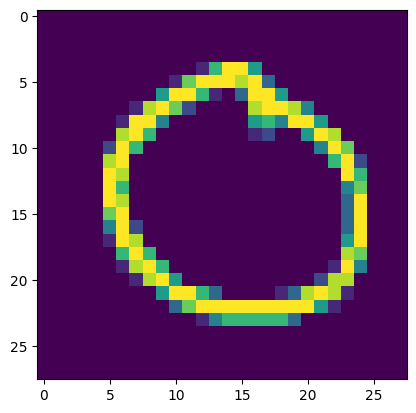

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: 0


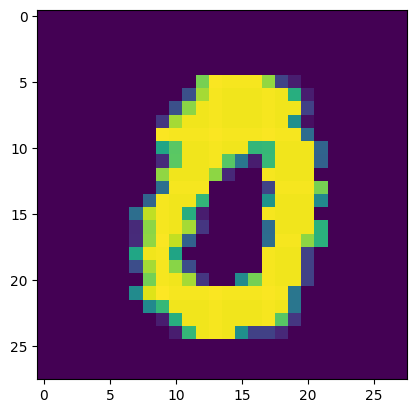

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 1


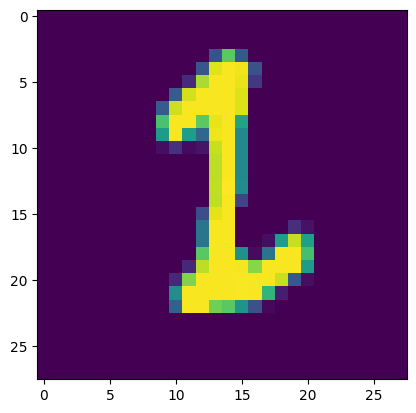

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 7


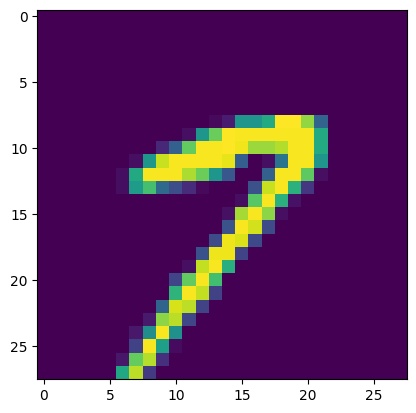

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: 1


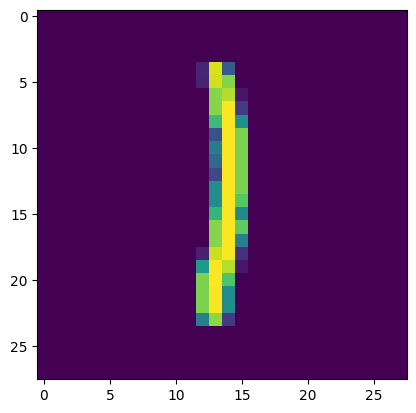

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 6


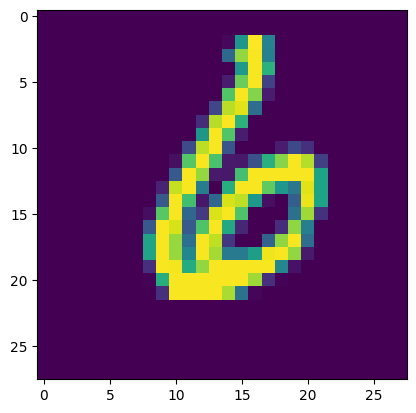

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


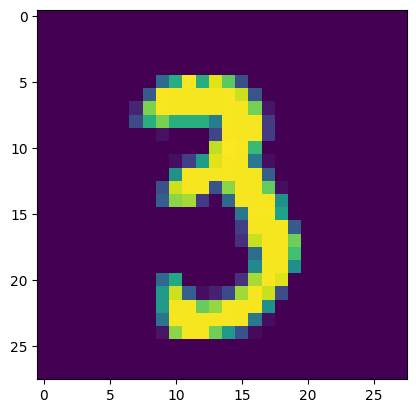

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 0


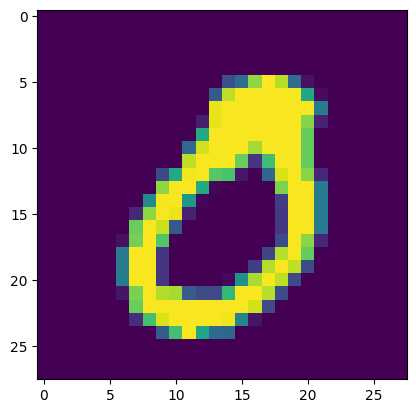

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 7


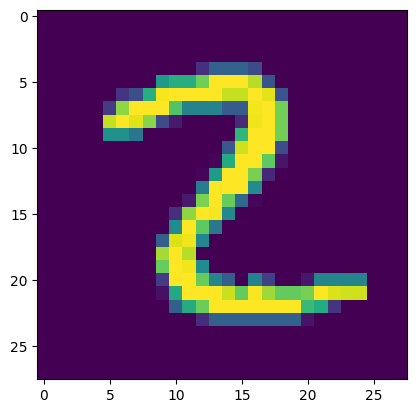

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 1


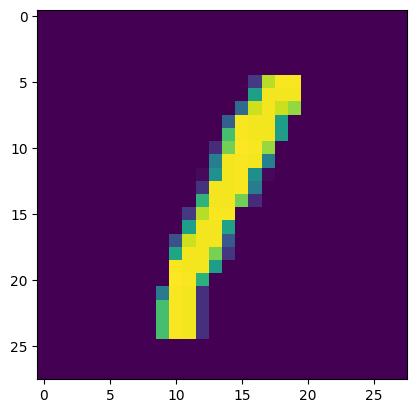

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 1


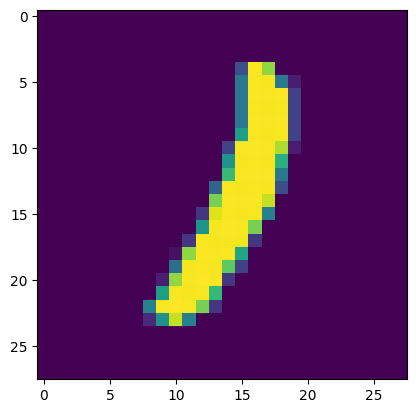

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 7


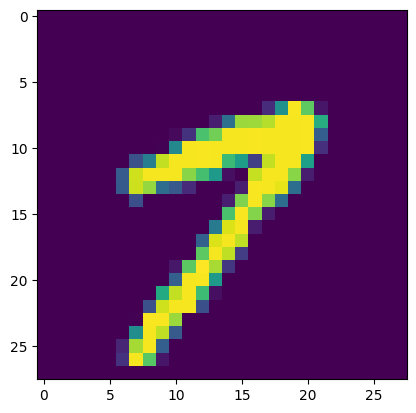

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 8


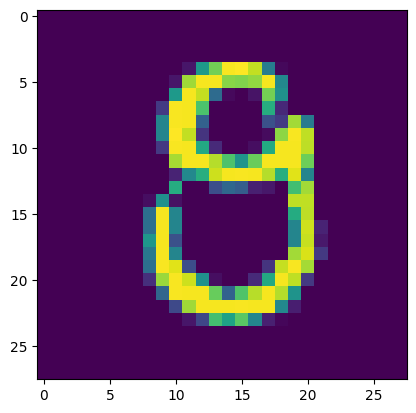

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 0


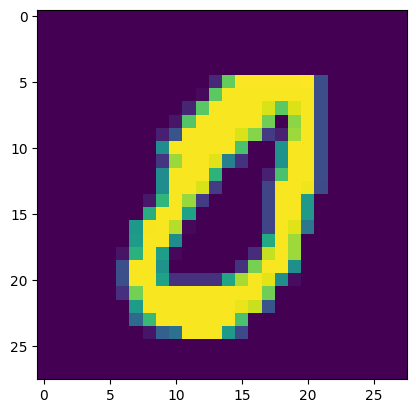

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 0


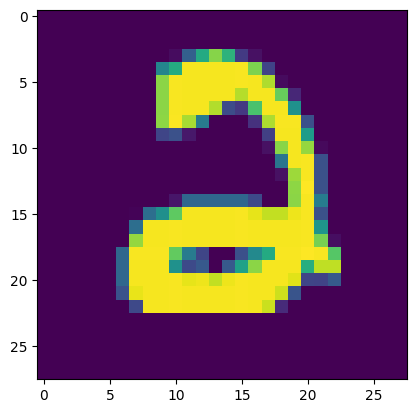

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: 6


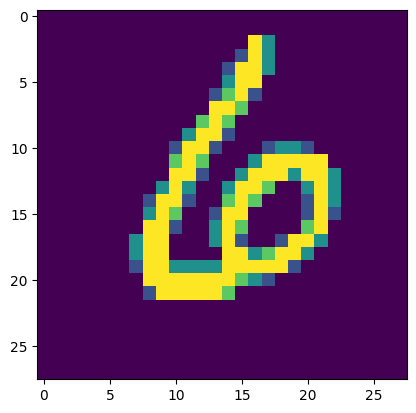

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 7


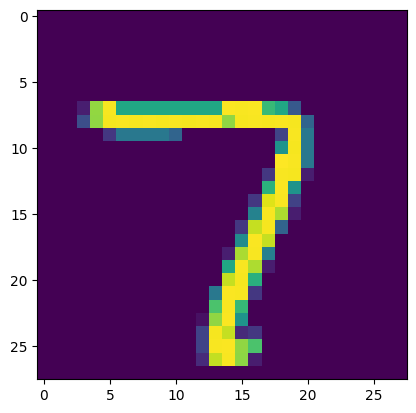

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 8


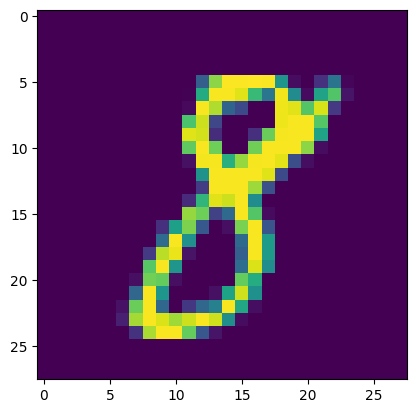

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


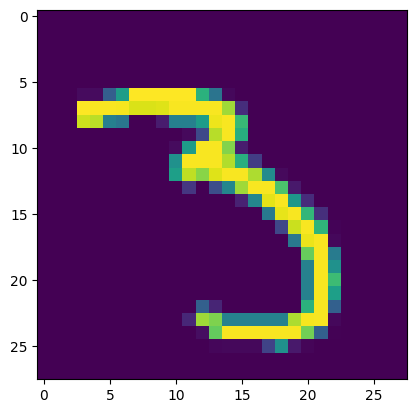

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 9


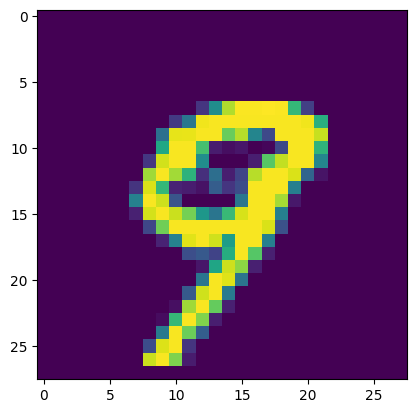

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class: 0


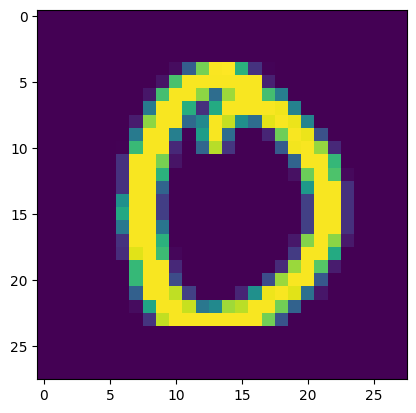

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 4


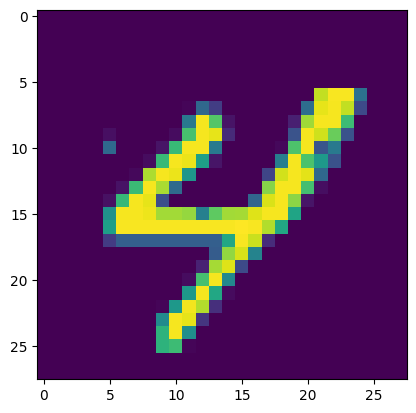

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 6


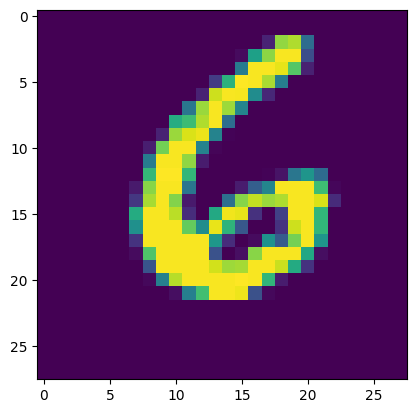

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 7


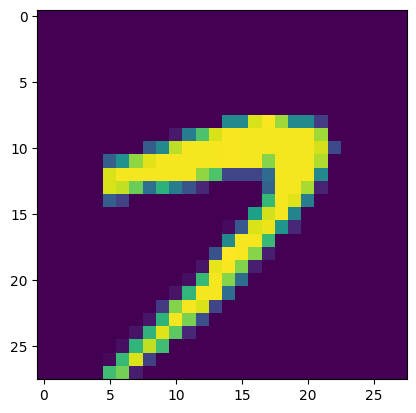

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 4


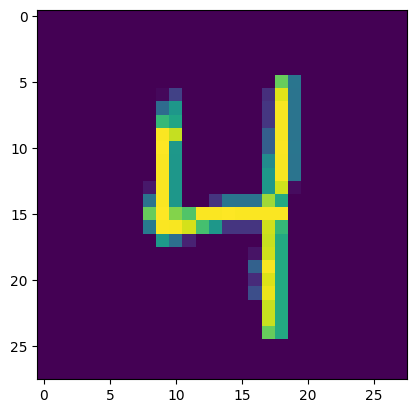

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 6


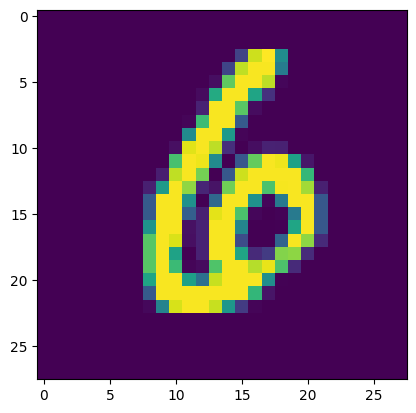

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: 3


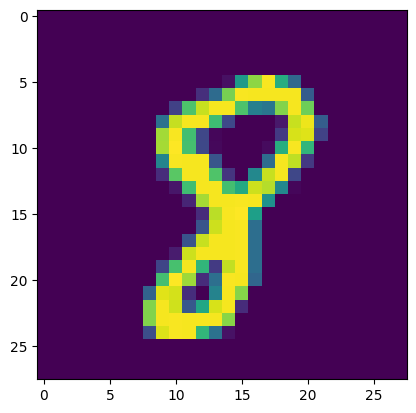

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 0


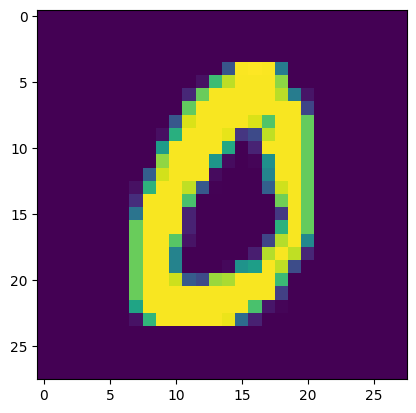

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 7


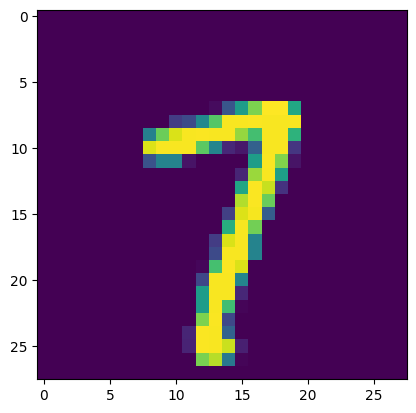

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 3


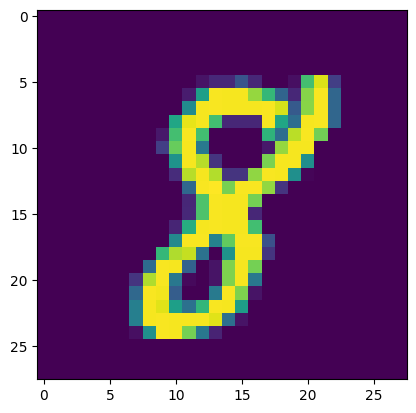

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: 3


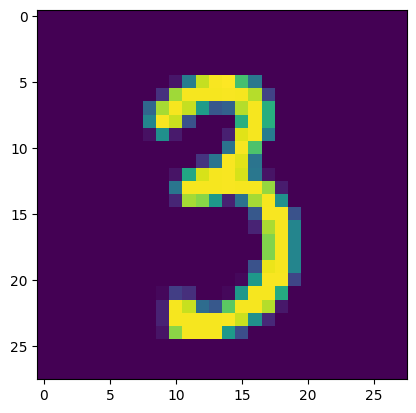

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 1


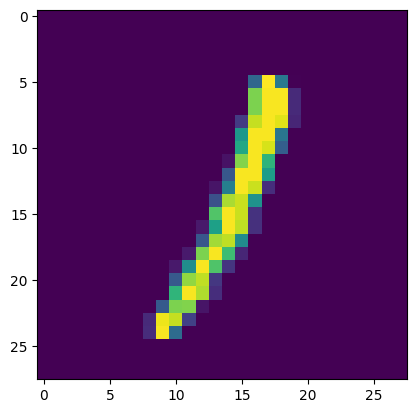

In [34]:
def predict(i):
  img = i.reshape(i.shape[0],i.shape[1],1)
  img = array_to_img(img)
  img = img.convert('L')
  prediction = loaded_model.predict(i.reshape(1,i.shape[0],i.shape[1],1))
  predicted_class = np.argmax(prediction)
  print(f"Predicted Class: {predicted_class}")
  plt.imshow(img)
  plt.show()
for i in range(100):
  predict(images[i])